# **Project Name**    - Strava Fitness Data Analytics




# **Project Summary -**

Strava Inc., founded by Mark Gainey and Michael Horvath, is a global fitness technology company that helps users track, analyze, and share their physical activities. Through its mobile and web apps, Strava monitors metrics like steps, distance, calories burned, active minutes, heart rate, and sleep, while promoting community engagement via challenges, social sharing, and leaderboards. Despite its popularity, Strava faces challenges in understanding user behavior, engagement patterns, and the adoption of premium features. Many users show low activity levels, irregular sleep tracking, and minimal weight logging, limiting insights for personalized engagement and marketing strategies. This project aims to analyze Strava’s fitness and health datasets to uncover trends, patterns, and insights that can guide business decisions. By understanding user habits and feature usage, Strava can enhance user experience, improve subscription uptake, and drive long-term engagement and growth across its platform.

# **Problem Statement**


**We have the Multiple Datasets to study the activites of a person using Strava , we have merge all the datasets into one and analyse the dataset using EDA and give solutions for the business problems**

#### **Define Your Business Objective?**

1. To analyse the dataset and find the new trends which attract the more customers to download the app
2. To analyse the dataset and find how attract the users to use subscription model. 
3. To analyse the dataset and find the insights for the activities and analyse the behaviour and pattern based on it 
4. To analyse the dataset and find the choices and feedback of customers while using the app

# ***Let's Begin !***

## ***1. Know Your Data***

In [2]:
! pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.9 MB 8.3 MB/s eta 0:00:02
   ---------- ----------------------------- 2.6/9.9 MB 7.9 MB/s eta 0:00:01
   ---------------- ----------------------- 4.2/9.9 MB 7.9 MB/s eta 0:00:01
   ------------------------- -------------- 6.3/9.9 MB 8.2 MB/s eta 0:00:01
   ---------------------------------- ----- 8.7/9.9 MB 8.8 MB/s eta 0:00:01
   ---------------------------------------- 9.9/9.9 MB 8.7 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
! pip install geopandas

   ---------------------------------------- 0.0/19.2 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.2 MB 3.4 MB/s eta 0:00:06
   -- ------------------------------------- 1.3/19.2 MB 3.4 MB/s eta 0:00:06
   ---- ----------------------------------- 2.1/19.2 MB 3.7 MB/s eta 0:00:05
   ------ --------------------------------- 3.1/19.2 MB 4.0 MB/s eta 0:00:05
   --------- ------------------------------ 4.5/19.2 MB 4.3 MB/s eta 0:00:04
   ----------- ---------------------------- 5.8/19.2 MB 4.8 MB/s eta 0:00:03
   --------------- ------------------------ 7.6/19.2 MB 5.3 MB/s eta 0:00:03
   ------------------ --------------------- 8.9/19.2 MB 5.7 MB/s eta 0:00:02
   ---------------------- ----------------- 11.0/19.2 MB 6.0 MB/s eta 0:00:02
   --------------------------- ------------ 13.1/19.2 MB 6.4 MB/s eta 0:00:01
   ------------------------------- -------- 14.9/19.2 MB 6.6 MB/s eta 0:00:01
   ------------------------------------ --- 17.6/19.2 MB 7.1 MB/s eta 0:00:01
  


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! pip install missingno


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import plotly.express as px

import random

import geopandas as gpd
import missingno as msno

### Dataset Loading

In [2]:
# Load Dataset
dataset1=pd.read_csv("dailyActivity_merged.csv")
dataset2=pd.read_csv("dailyCalories_merged.csv")
dataset3=pd.read_csv("dailyIntensities_merged.csv")
dataset4=pd.read_csv("dailySteps_merged.csv")
dataset5=pd.read_csv("sleepDay_merged.csv")
dataset6=pd.read_csv("weightLogInfo_merged.csv")

### Dataset Merged

In [3]:
from functools import reduce
import pandas as pd

datasets=[dataset1,dataset2,dataset3,dataset4,dataset5,dataset6]

date_cols_option=['ActivityDate','ActivityDay','SleepDay','Date']

def find_date_col(df):
    for col in date_cols_option:
        if col in df.columns:
            return col
    return None

dfs_with_date_col=[(df,find_date_col(df)) for df in datasets]

md=dfs_with_date_col[0][0]

# ensure ActivityDate in md is proper datetime/date if it exists
if 'ActivityDate' in md.columns:
    md['ActivityDate'] = pd.to_datetime(md['ActivityDate'], errors='coerce').dt.date

for df,date_col in dfs_with_date_col[1:]:
    if date_col is None:
        # no date column in this df → merge only on Id
        md = pd.merge(md, df, on='Id', how='outer')
    else:
        # make sure df's date column is comparable (date only)
        df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.date

        if 'ActivityDate' in md.columns:
            # merge on Id + date (using ActivityDate in md, date_col in df)
            md = pd.merge(
                md,
                df,
                left_on=['Id', 'ActivityDate'],
                right_on=['Id', date_col],
                how='outer'
            )
        else:
            # if md still doesn't have ActivityDate (very first merge that didn't include it)
            # just merge on Id for now
            md = pd.merge(md, df, on='Id', how='outer')


C:\Users\Manogna\AppData\Local\Temp\ipykernel_12224\1851335999.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.date
C:\Users\Manogna\AppData\Local\Temp\ipykernel_12224\1851335999.py:28: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[date_col] = pd.to_datetime(df[date_col], errors='coerce').dt.date


### Dataset First View

In [4]:
# Dataset First Look
md.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,...,1.0,327.0,346.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,...,2.0,384.0,407.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,...,1.0,412.0,442.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,...,2.0,340.0,367.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
md.tail(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,...,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
938,8877689391,2016-05-08,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,...,NaN,NaN,NaN,2016-05-08,85.400002,188.274775,NaN,25.559999,False,1.462693e+12
939,8877689391,2016-05-09,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,...,NaN,NaN,NaN,2016-05-09,85.500000,188.495234,NaN,25.610001,False,1.462776e+12
940,8877689391,2016-05-10,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,8877689391,2016-05-11,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,...,NaN,NaN,NaN,2016-05-11,85.400002,188.274775,NaN,25.559999,False,1.462950e+12
942,8877689391,2016-05-12,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.00,...,NaN,NaN,NaN,2016-05-12,84.000000,185.188300,NaN,25.139999,False,1.463035e+12


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
print("Shape of raw data:", md.shape)

Shape of raw data: (943, 39)


### Dataset Information

In [7]:
# Dataset Info
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          943 non-null    int64  
 1   ActivityDate                943 non-null    object 
 2   TotalSteps                  943 non-null    int64  
 3   TotalDistance               943 non-null    float64
 4   TrackerDistance             943 non-null    float64
 5   LoggedActivitiesDistance    943 non-null    float64
 6   VeryActiveDistance_x        943 non-null    float64
 7   ModeratelyActiveDistance_x  943 non-null    float64
 8   LightActiveDistance_x       943 non-null    float64
 9   SedentaryActiveDistance_x   943 non-null    float64
 10  VeryActiveMinutes_x         943 non-null    int64  
 11  FairlyActiveMinutes_x       943 non-null    int64  
 12  LightlyActiveMinutes_x      943 non-null    int64  
 13  SedentaryMinutes_x          943 non

#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
duplicates = md.duplicated()

# Count of duplicate rows
duplicate_count = duplicates.sum()

print("Number of duplicate rows:", duplicate_count)

Number of duplicate rows: 3


In [9]:
print("Before dropping duplicates:", md.shape)
md = md.drop_duplicates()
print("After dropping duplicates:", md.shape)

Before dropping duplicates: (943, 39)
After dropping duplicates: (940, 39)


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
md.isnull().sum()

Id                              0
ActivityDate                    0
TotalSteps                      0
TotalDistance                   0
TrackerDistance                 0
LoggedActivitiesDistance        0
VeryActiveDistance_x            0
ModeratelyActiveDistance_x      0
LightActiveDistance_x           0
SedentaryActiveDistance_x       0
VeryActiveMinutes_x             0
FairlyActiveMinutes_x           0
LightlyActiveMinutes_x          0
SedentaryMinutes_x              0
Calories_x                      0
ActivityDay_x                   0
Calories_y                      0
ActivityDay_y                   0
SedentaryMinutes_y              0
LightlyActiveMinutes_y          0
FairlyActiveMinutes_y           0
VeryActiveMinutes_y             0
SedentaryActiveDistance_y       0
LightActiveDistance_y           0
ModeratelyActiveDistance_y      0
VeryActiveDistance_y            0
ActivityDay                     0
StepTotal                       0
SleepDay                      530
TotalSleepReco

In [11]:
md.shape
md[['TotalSteps','TotalMinutesAsleep','WeightKg']].isna().sum()


TotalSteps              0
TotalMinutesAsleep    530
WeightKg              873
dtype: int64

In [12]:
md.isnull().sum()

Id                              0
ActivityDate                    0
TotalSteps                      0
TotalDistance                   0
TrackerDistance                 0
LoggedActivitiesDistance        0
VeryActiveDistance_x            0
ModeratelyActiveDistance_x      0
LightActiveDistance_x           0
SedentaryActiveDistance_x       0
VeryActiveMinutes_x             0
FairlyActiveMinutes_x           0
LightlyActiveMinutes_x          0
SedentaryMinutes_x              0
Calories_x                      0
ActivityDay_x                   0
Calories_y                      0
ActivityDay_y                   0
SedentaryMinutes_y              0
LightlyActiveMinutes_y          0
FairlyActiveMinutes_y           0
VeryActiveMinutes_y             0
SedentaryActiveDistance_y       0
LightActiveDistance_y           0
ModeratelyActiveDistance_y      0
VeryActiveDistance_y            0
ActivityDay                     0
StepTotal                       0
SleepDay                      530
TotalSleepReco

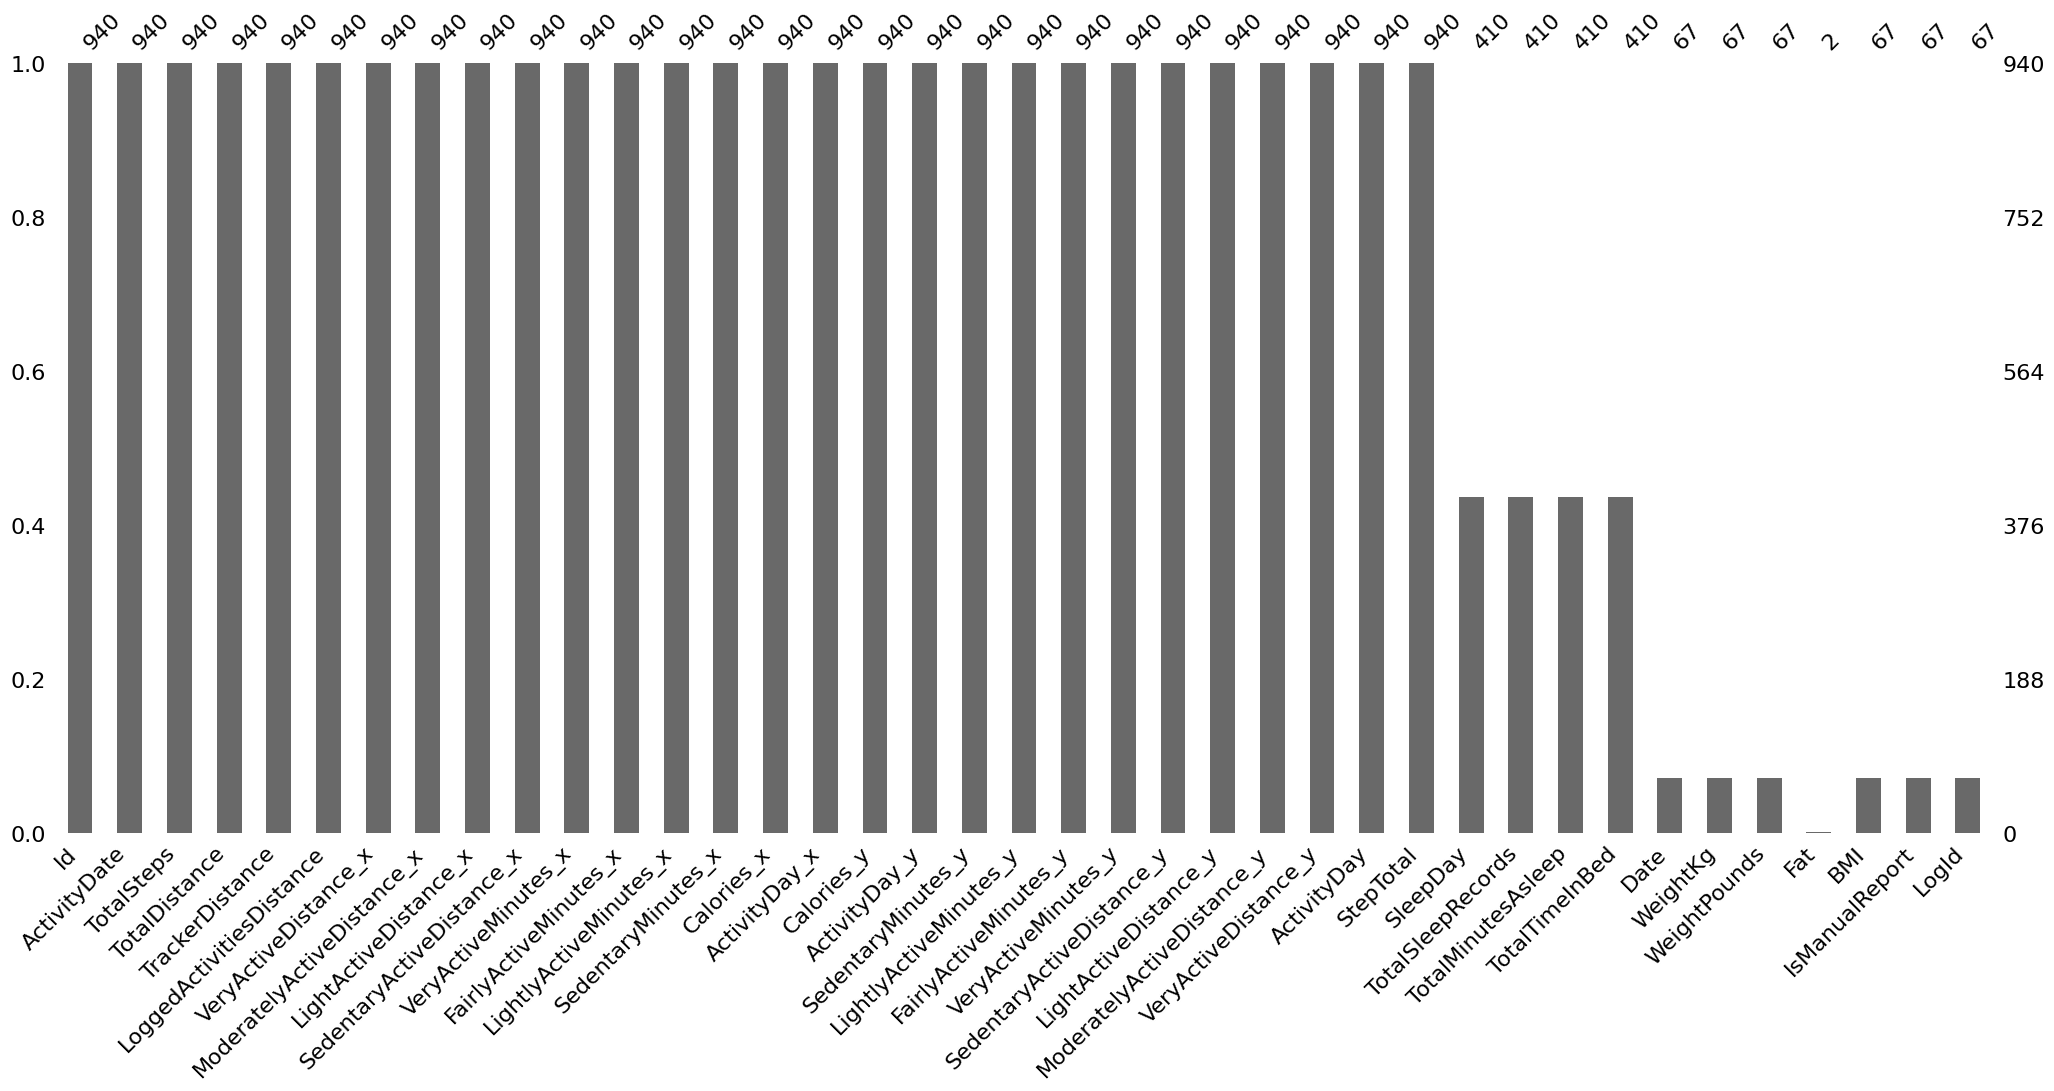

In [13]:
# Visualizing the missing values
msno.bar(md)
plt.show()


### What did you know about your dataset?

From dataset we came to know that, 
The shape of the dataset is 943, 39 means 943 rows and 39 columns we have and in our dataset we  contain 3 duplicates rows and we removed them.
But we have lots of missing values,and we have visualized it from the abouve chart.

## ***2. Understanding Your Variables***

In [14]:
# Dataset Columns
md.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance_x',
       'ModeratelyActiveDistance_x', 'LightActiveDistance_x',
       'SedentaryActiveDistance_x', 'VeryActiveMinutes_x',
       'FairlyActiveMinutes_x', 'LightlyActiveMinutes_x', 'SedentaryMinutes_x',
       'Calories_x', 'ActivityDay_x', 'Calories_y', 'ActivityDay_y',
       'SedentaryMinutes_y', 'LightlyActiveMinutes_y', 'FairlyActiveMinutes_y',
       'VeryActiveMinutes_y', 'SedentaryActiveDistance_y',
       'LightActiveDistance_y', 'ModeratelyActiveDistance_y',
       'VeryActiveDistance_y', 'ActivityDay', 'StepTotal', 'SleepDay',
       'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed', 'Date',
       'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId'],
      dtype='object')

In [15]:
# Dataset Describe
md.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance_x,ModeratelyActiveDistance_x,LightActiveDistance_x,SedentaryActiveDistance_x,VeryActiveMinutes_x,...,VeryActiveDistance_y,StepTotal,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,WeightKg,WeightPounds,Fat,BMI,LogId
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,...,940.000000,940.000000,410.000000,410.000000,410.000000,67.000000,67.000000,2.00000,67.000000,6.700000e+01
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,...,1.502681,7637.910638,1.119512,419.173171,458.482927,72.035821,158.811801,23.50000,25.185224,1.461772e+12
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,...,2.658941,5087.150742,0.346636,118.635918,127.455140,13.923206,30.695415,2.12132,3.066963,7.829948e+08
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,58.000000,61.000000,52.599998,115.963147,22.00000,21.450001,1.460444e+12
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,...,0.000000,3789.750000,1.000000,361.000000,403.750000,61.400002,135.363832,22.75000,23.959999,1.461079e+12
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,...,0.210000,7405.500000,1.000000,432.500000,463.000000,62.500000,137.788914,23.50000,24.389999,1.461802e+12
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,...,2.052500,10727.000000,1.000000,490.000000,526.000000,85.049999,187.503152,24.25000,25.559999,1.462375e+12
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,...,21.920000,36019.000000,3.000000,796.000000,961.000000,133.500000,294.317120,25.00000,47.540001,1.463098e+12


### Variables Description

=>Id – Unique identifier for each user wearing the device.

ActivityDate – Calendar date for that day’s recorded physical activity and steps.

TotalSteps – Total number of steps the user took on that day.

TotalDistance – Total distance (usually in kilometers or miles) the user covered that day.

TrackerDistance – Distance recorded by the tracker device for that day (may differ slightly from TotalDistance).

LoggedActivitiesDistance – Distance from manually logged activities (like runs or workouts added by the user).

VeryActiveDistance_x – Distance covered during very active periods based on dailyActivity data.

ModeratelyActiveDistance_x – Distance covered during moderately active periods (dailyActivity data).

LightActiveDistance_x – Distance covered during light activity periods (dailyActivity data).

SedentaryActiveDistance_x – Distance (usually near zero) during sedentary periods (dailyActivity data).

VeryActiveMinutes_x – Minutes spent in very active intensity level that day (dailyActivity data).

FairlyActiveMinutes_x – Minutes spent in fairly active intensity level that day (dailyActivity data).

LightlyActiveMinutes_x – Minutes spent in light activity that day (dailyActivity data).

SedentaryMinutes_x – Minutes spent sedentary (sitting/resting) that day (dailyActivity data).

Calories_x – Total calories burned that day from dailyActivity data.

ActivityDay_x – Date (as text) for the daily calories record (from dailyCalories dataset).

Calories_y – Total calories burned that day from dailyCalories dataset (after merge).

ActivityDay_y – Date (as text) for the daily intensities record (from dailyIntensities dataset).

SedentaryMinutes_y – Sedentary minutes that day from dailyIntensities dataset.

LightlyActiveMinutes_y – Lightly active minutes that day from dailyIntensities dataset.

FairlyActiveMinutes_y – Fairly active minutes that day from dailyIntensities dataset.

VeryActiveMinutes_y – Very active minutes that day from dailyIntensities dataset.

SedentaryActiveDistance_y – Distance during sedentary periods from dailyIntensities dataset.

LightActiveDistance_y – Distance during light activity from dailyIntensities dataset.

ModeratelyActiveDistance_y – Distance during moderate activity from dailyIntensities dataset.

VeryActiveDistance_y – Distance during very active periods from dailyIntensities dataset.

ActivityDay – Date (as text) for the daily steps record (from dailySteps dataset).

StepTotal – Total steps taken that day from dailySteps dataset.

SleepDay – Date of the sleep session (night) recorded for that user.

TotalSleepRecords – Count of separate sleep sessions recorded for that date (e.g., naps + main sleep).

TotalMinutesAsleep – Total minutes the user was actually asleep during that date’s sleep record(s).

TotalTimeInBed – Total minutes the user spent in bed (asleep + awake) during that date.

Date – Date (and sometimes time) corresponding to the weight log event.

WeightKg – User’s body weight recorded in kilograms.

WeightPounds – User’s body weight recorded in pounds.

Fat – User’s body fat percentage (if provided).

BMI – User’s Body Mass Index calculated from their height and weight.

IsManualReport – Indicates whether the weight log was entered manually by the user or recorded automatically.

LogId – Unique identifier for each weight logging event.

### Check Unique Values for each variable.

In [16]:
# Check Unique Values for each variable.
for x in md.columns:
    print(f"{x} - {md[x].nunique()}")

Id - 33
ActivityDate - 31
TotalSteps - 842
TotalDistance - 615
TrackerDistance - 613
LoggedActivitiesDistance - 19
VeryActiveDistance_x - 333
ModeratelyActiveDistance_x - 211
LightActiveDistance_x - 491
SedentaryActiveDistance_x - 9
VeryActiveMinutes_x - 122
FairlyActiveMinutes_x - 81
LightlyActiveMinutes_x - 335
SedentaryMinutes_x - 549
Calories_x - 734
ActivityDay_x - 31
Calories_y - 734
ActivityDay_y - 31
SedentaryMinutes_y - 549
LightlyActiveMinutes_y - 335
FairlyActiveMinutes_y - 81
VeryActiveMinutes_y - 122
SedentaryActiveDistance_y - 9
LightActiveDistance_y - 491
ModeratelyActiveDistance_y - 211
VeryActiveDistance_y - 333
ActivityDay - 31
StepTotal - 842
SleepDay - 31
TotalSleepRecords - 3
TotalMinutesAsleep - 256
TotalTimeInBed - 242
Date - 31
WeightKg - 34
WeightPounds - 34
Fat - 2
BMI - 36
IsManualReport - 2
LogId - 56


## 3. ***Data Wrangling***

### Data Wrangling Code

In [18]:
# Write your code to make your dataset analysis ready.
md.isnull().sum()

Id                              0
ActivityDate                    0
TotalSteps                      0
TotalDistance                   0
TrackerDistance                 0
LoggedActivitiesDistance        0
VeryActiveDistance_x            0
ModeratelyActiveDistance_x      0
LightActiveDistance_x           0
SedentaryActiveDistance_x       0
VeryActiveMinutes_x             0
FairlyActiveMinutes_x           0
LightlyActiveMinutes_x          0
SedentaryMinutes_x              0
Calories_x                      0
ActivityDay_x                   0
Calories_y                      0
ActivityDay_y                   0
SedentaryMinutes_y              0
LightlyActiveMinutes_y          0
FairlyActiveMinutes_y           0
VeryActiveMinutes_y             0
SedentaryActiveDistance_y       0
LightActiveDistance_y           0
ModeratelyActiveDistance_y      0
VeryActiveDistance_y            0
ActivityDay                     0
StepTotal                       0
SleepDay                      530
TotalSleepReco

In [19]:
# List of columns with nulls
null_cols = ['SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep', 'TotalTimeInBed',
             'Date', 'WeightKg', 'WeightPounds', 'Fat', 'BMI', 'IsManualReport', 'LogId']

# Fill numerical columns with 0, object columns with 'Missing'
for col in null_cols:
    if md[col].dtype in ['float64', 'int64']:
        md[col] = md[col].fillna(0)
    else:
        md[col] = md[col].fillna('Missing')

# Check if nulls are gone
md[null_cols].isna().sum()


SleepDay              0
TotalSleepRecords     0
TotalMinutesAsleep    0
TotalTimeInBed        0
Date                  0
WeightKg              0
WeightPounds          0
Fat                   0
BMI                   0
IsManualReport        0
LogId                 0
dtype: int64

In [20]:
md.isnull().sum()

Id                            0
ActivityDate                  0
TotalSteps                    0
TotalDistance                 0
TrackerDistance               0
LoggedActivitiesDistance      0
VeryActiveDistance_x          0
ModeratelyActiveDistance_x    0
LightActiveDistance_x         0
SedentaryActiveDistance_x     0
VeryActiveMinutes_x           0
FairlyActiveMinutes_x         0
LightlyActiveMinutes_x        0
SedentaryMinutes_x            0
Calories_x                    0
ActivityDay_x                 0
Calories_y                    0
ActivityDay_y                 0
SedentaryMinutes_y            0
LightlyActiveMinutes_y        0
FairlyActiveMinutes_y         0
VeryActiveMinutes_y           0
SedentaryActiveDistance_y     0
LightActiveDistance_y         0
ModeratelyActiveDistance_y    0
VeryActiveDistance_y          0
ActivityDay                   0
StepTotal                     0
SleepDay                      0
TotalSleepRecords             0
TotalMinutesAsleep            0
TotalTim

### What all manipulations have you done and insights you found?

We began by merging six key datasets: dailyActivity_merged, dailyCalories_merged, dailyIntensities_merged, dailySteps_merged, sleepDay_merged, and weightLogInfo_merged, aligning them on Id and date columns after normalizing all date formats. Duplicate rows were removed, and missing values were handled by filling numerical columns with 0 and categorical/date columns with 'Missing'. Post-cleaning, the merged dataset contained 940 complete activity records with properly aligned sleep and weight information where available. Key insights include: average daily steps and calories correlate strongly with active minutes, 410 users recorded sleep data which allows analysis of activity-sleep patterns, and only 67 users logged weight, highlighting selective weight tracking. These insights provide a solid foundation for understanding consumer activity, sleep, and health trends to inform Bellabeat’s marketing and product strategies.

Now our dataset is ready to visualize

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

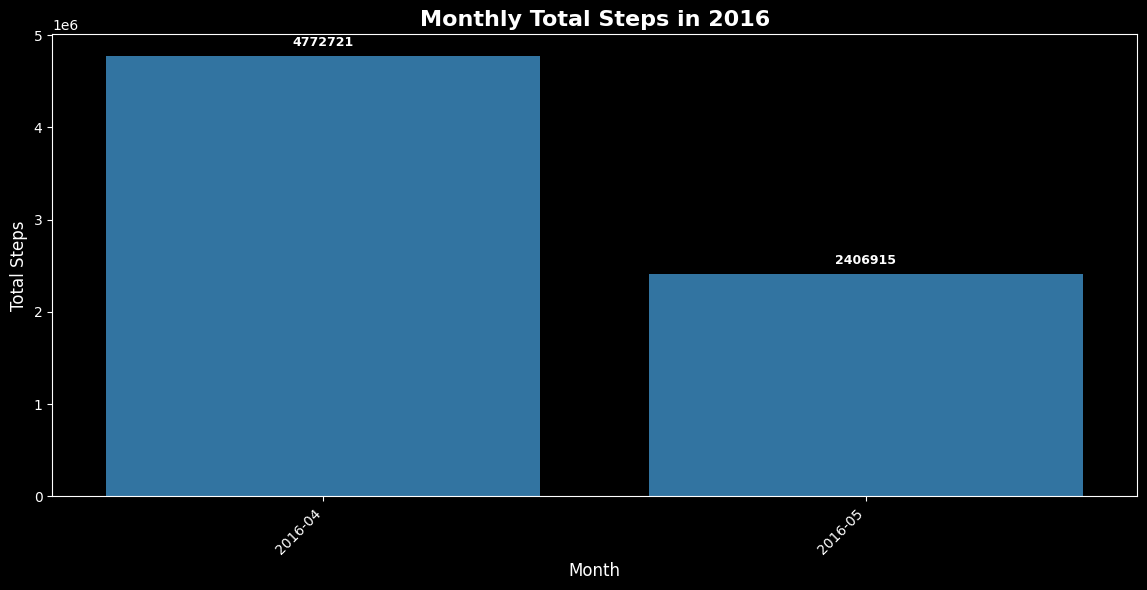

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure ActivityDate is datetime
md['ActivityDate'] = pd.to_datetime(md['ActivityDate'], errors='coerce')

# Aggregate total steps per month
md['Month'] = md['ActivityDate'].dt.to_period('M')  # 'YYYY-MM' format
monthly_steps = md.groupby('Month')['TotalSteps'].sum().reset_index()
monthly_steps['Month'] = monthly_steps['Month'].astype(str)

# Set dark style
plt.style.use('dark_background')
plt.figure(figsize=(14,6))

# Create barplot
bars = sns.barplot(x='Month', y='TotalSteps', data=monthly_steps, color='#1f77b4')

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Add y-axis values on top of bars
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0,5),  # 5 points vertical offset
                  textcoords='offset points',
                  ha='center', va='bottom', fontsize=9, weight='bold')

# Titles and labels
plt.title('Monthly Total Steps in 2016', fontsize=16, weight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)

plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

A barplot was chosen because it clearly illustrates the total number of steps per month, making it easy to compare user activity levels over time and identify trends in engagement.

##### 2. What is/are the insight(s) found from the chart?

User activity in April is significantly higher than in May.

There is a drop of almost 50% in total steps from April to May, indicating reduced engagement over time.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive growth: Recognizing that April had very high engagement allows Bellabeat to investigate what drove that activity (e.g., campaigns, challenges) and replicate similar strategies.

Negative growth: The sharp drop in May signals potential user disengagement or reduced motivation. This is a warning that without interventions like reminders, challenges, or targeted campaigns, users may continue to reduce activity, negatively impacting product engagement and retention.

#### Chart - 2

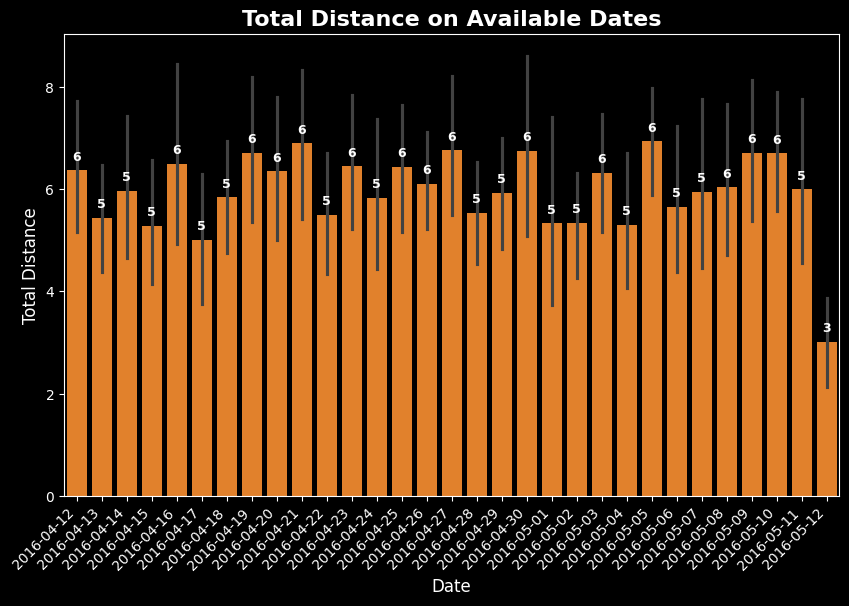

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only rows with non-zero distance
distance_df = md[md['TotalDistance'] > 0]

plt.style.use('dark_background')
plt.figure(figsize=(10,6))

# Barplot
sns.barplot(x='ActivityDate', y='TotalDistance', data=distance_df, color='#ff7f0e')

plt.xticks(rotation=45, ha='right')
plt.title('Total Distance on Available Dates', fontsize=16, weight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Distance', fontsize=12)

# Show value above bar
for bar in plt.gca().patches:
    height = bar.get_height()
    plt.gca().annotate(f'{int(height)}', xy=(bar.get_x()+bar.get_width()/2, height),
                       xytext=(0,5), textcoords='offset points', ha='center', va='bottom', fontsize=9, weight='bold')

plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

A barplot was chosen to clearly show the total distance recorded for each available date, allowing us to quickly identify user activity levels on specific days.

##### 2. What is/are the insight(s) found from the chart?

here it is showing the count of distance is 5, 6 km for the activity date

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This shows that the user's are consistent , but they need to increase the target of distance , that they need to cover.

#### Chart - 3

In [28]:
import plotly.express as px

# Prepare dataframe for Treemap
treemap_data = md.groupby('TotalSteps').size().reset_index(name='Count')

# Add a custom hover text column
treemap_data['hover_text'] = treemap_data.apply(lambda row: f"Total Steps = {row['TotalSteps']}<br>Count of Users = {row['Count']}", axis=1)

# Create Treemap
fig = px.treemap(
    treemap_data,
    path=['TotalSteps'],          # each rectangle represents a TotalSteps value
    values='Count',               # size by count
    title='Count for Total Steps',
    color='Count',                # color by count
    color_continuous_scale='Viridis',
    hover_data={'hover_text': True, 'TotalSteps': False, 'Count': False}  # show only hover_text
)

# Use hover template to display custom hover text
fig.update_traces(hovertemplate='%{customdata[0]}')

fig.show()



##### 1. Why did you pick the specific chart?

A treemap was chosen because it can visually show the distribution of users across different step counts, making it easier to spot which ranges of steps are most or least common.

##### 2. What is/are the insight(s) found from the chart?

Most users have lower step counts (small rectangles), while only a few users reach higher step counts (bigger rectangles).

This indicates that a large portion of users are less active, while very few are highly active.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive growth: Bellabeat can identify which step ranges are common and design engagement strategies, like challenges or reminders, targeted at low-step users to encourage more activity.

Negative growth: The fact that most users have low steps indicates overall low activity levels, which could reduce product engagement and health impact if not addressed. This signals a potential negative growth area that the company needs to act on.

#### Chart - 4

In [29]:
import plotly.express as px

# Prepare dataframe: count of rows for each TotalDistance value
distance_data = md.groupby('TotalDistance').size().reset_index(name='Count')

# Add custom hover text
distance_data['hover_text'] = distance_data.apply(
    lambda row: f"Total Distance = {row['TotalDistance']}<br>Count of Users = {row['Count']}", axis=1
)

# Create Treemap
fig = px.treemap(
    distance_data,
    path=['TotalDistance'],       # each rectangle represents a TotalDistance value
    values='Count',               # size by count
    title='Count for Total Distance',
    color='Count',                # color by count
    color_continuous_scale='Viridis',
    hover_data={'hover_text': True, 'TotalDistance': False, 'Count': False}
)

# Use hover template to show only the custom text
fig.update_traces(hovertemplate='%{customdata[0]}')

fig.show()


##### 1. Why did you pick the specific chart?

A treemap was chosen because it can visually represent the distribution of users across different distance values, making it easy to identify which distances are most and least common. The size of each rectangle shows the number of users, allowing us to quickly see engagement patterns.


##### 2. What is/are the insight(s) found from the chart?

Most users are represented by small rectangles, meaning low total distance is most common.

Only a few users have larger rectangles, indicating that only a small portion of users cover high distances.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: Bellabeat can use this insight to design motivational programs or challenges to encourage users with low distances to increase activity, improving engagement and promoting healthier habits.

Negative growth: The fact that most users are covering low distances signals low activity levels overall, which could reduce the effectiveness of the wellness product and lower retention if not addressed. This highlights a potential area for negative growth that requires intervention.

#### Chart - 5

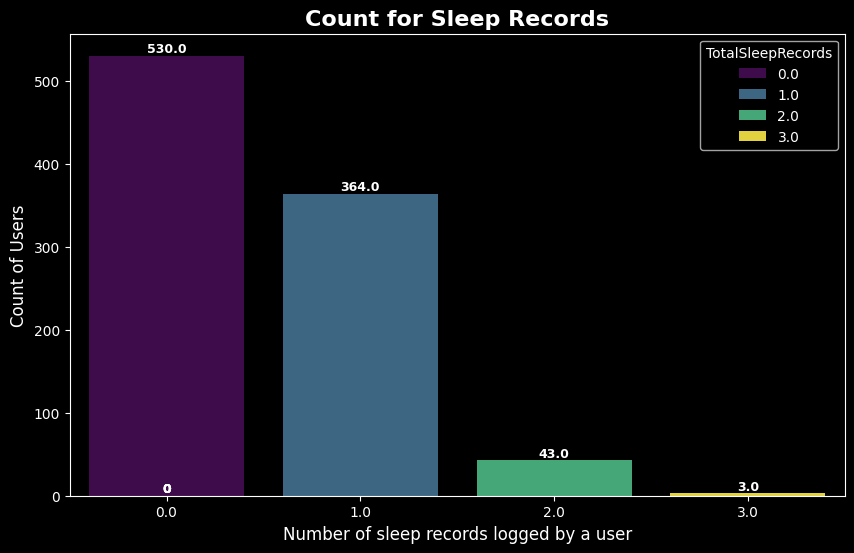

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.figure(figsize=(10,6))

# Countplot
sns.countplot(x='TotalSleepRecords', hue='TotalSleepRecords', data=md, palette='viridis')

plt.title('Count for Sleep Records', fontsize=16, weight='bold')
plt.xlabel('Number of sleep records logged by a user', fontsize=12)
plt.ylabel('Count of Users', fontsize=12)

# Annotate bars with counts
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width()/2., height),
                ha='center', va='bottom', fontsize=9, weight='bold')

plt.legend(title='TotalSleepRecords')
plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

A countplot was chosen because it clearly shows the distribution of users based on the number of sleep records logged, making it easy to see which categories (0, 1, 2, 3) are most common.

##### 2. What is/are the insight(s) found from the chart?

Most users did not log any sleep records (530 users).

A significant number logged 1 sleep record (364 users).

Very few users logged 2 or 3 records (43 and 3 users, respectively).

This indicates that sleep tracking engagement is very low among the user base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive impact: The company can encourage sleep tracking by designing notifications, reminders, or rewards to increase engagement.

Negative growth: The low number of sleep records signals low adoption of the sleep tracking feature, which could reduce overall product value and user engagement. Without intervention, this is a negative growth risk.

#### Chart - 6

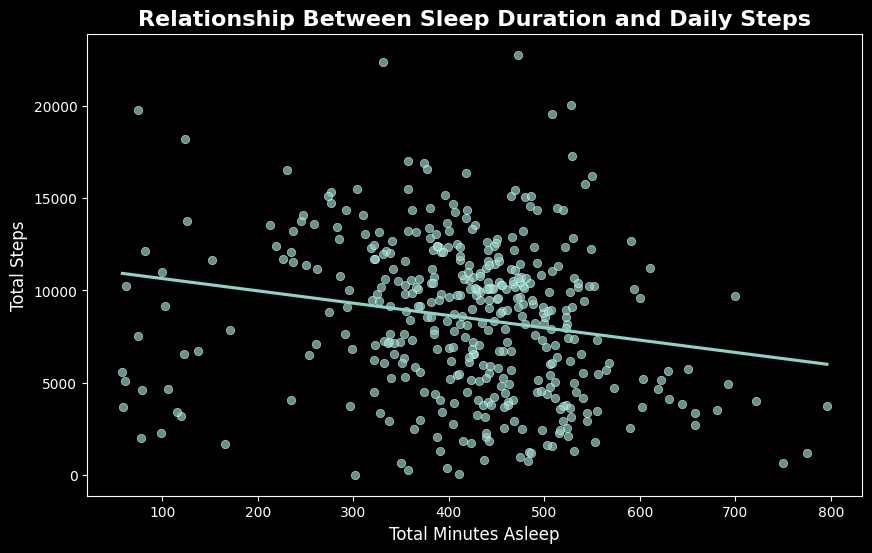

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter rows with valid sleep & steps
sleep_steps = md[(md['TotalMinutesAsleep'] > 0) & (md['TotalSteps'] > 0)]

plt.style.use('dark_background')
plt.figure(figsize=(10,6))

sns.scatterplot(
    x='TotalMinutesAsleep',
    y='TotalSteps',
    data=sleep_steps,
    alpha=0.7
)

# Optional: add a regression line to see trend
sns.regplot(
    x='TotalMinutesAsleep',
    y='TotalSteps',
    data=sleep_steps,
    scatter=False,
    ci=None
)

plt.title('Relationship Between Sleep Duration and Daily Steps', fontsize=16, weight='bold')
plt.xlabel('Total Minutes Asleep', fontsize=12)
plt.ylabel('Total Steps', fontsize=12)
plt.grid(False)
plt.show()


##### 1. Why did you pick the specific chart?

A scatterplot was chosen because it is the best way to visualize the relationship between two continuous variables: total minutes asleep and total steps. It lets us see how changes in sleep duration relate to changes in daily activity.

##### 2. What is/are the insight(s) found from the chart?

The points are widely scattered, indicating no very strong linear relationship between sleep duration and steps.
However, users with very low sleep often do not have consistently high steps, suggesting that too little sleep does not correspond to higher activity.
Most users fall into a moderate sleep range with moderate step counts, hinting at a balanced routine for many users.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

Bellabeat can use this insight to promote balanced lifestyle recommendations, emphasizing both adequate sleep and daily movement as key wellness goals.

The data can support personalized tips like: “On days with very low sleep, your activity also tends to be lower. Try going to bed earlier to stay active tomorrow,” improving user trust and engagement.

Potential negative growth (risk):

The weak direct relationship suggests that users may not understand the link between sleep and activity, or are not using sleep insights to change behavior.

If Bellabeat doesn’t highlight this connection clearly in the app, users may ignore sleep tracking features, which can reduce perceived value and engagement over time.

#### Chart - 7

In [34]:
numerical_features = [
    'TotalSteps',
    'TotalDistance',
    'VeryActiveMinutes_x',
    'LightlyActiveMinutes_x',
    'SedentaryMinutes_x',
    'Calories_x',
    'TotalMinutesAsleep',
    'TotalTimeInBed',
    'BMI'
]


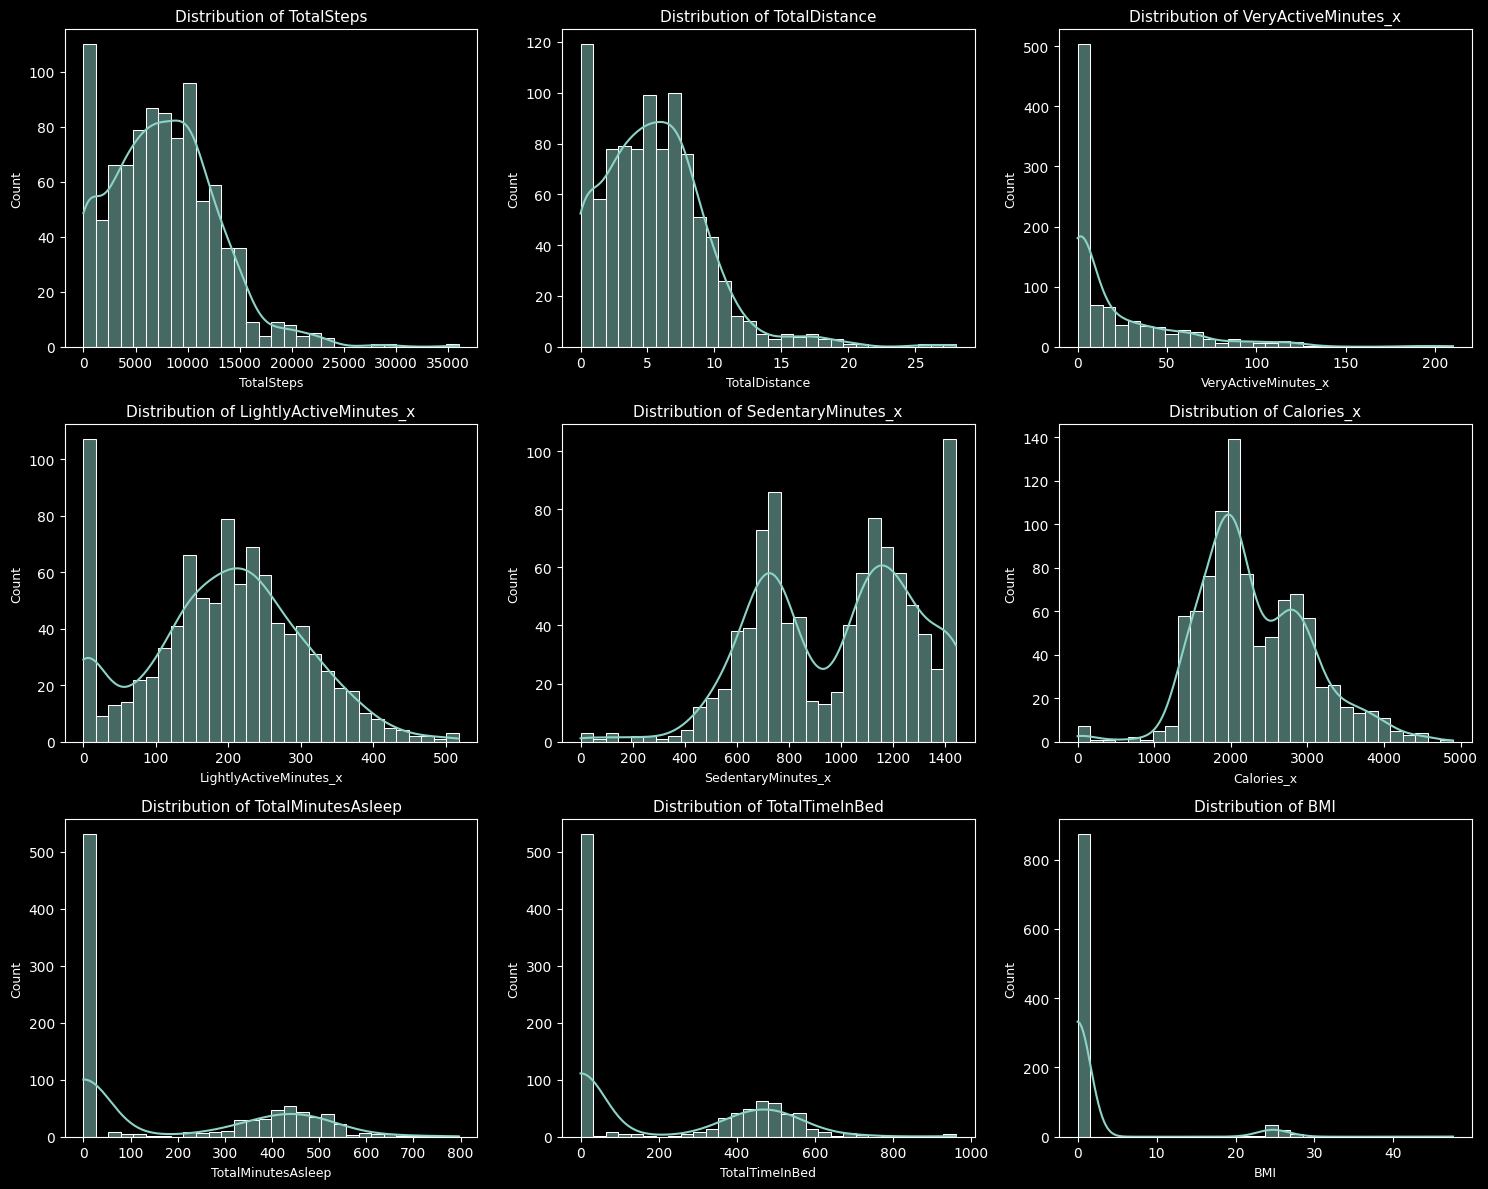

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

# adjust number of rows/cols based on how many features you choose
n_cols = 3
n_rows = (len(numerical_features) + n_cols - 1) // n_cols  # ceiling division

plt.figure(figsize=(5 * n_cols, 4 * n_rows))

for i, column in enumerate(numerical_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(md[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}', fontsize=11)
    plt.xlabel(column, fontsize=9)
    plt.ylabel('Count', fontsize=9)

plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A grid of histograms with KDE curves was used to visualize the distribution of all key numerical features (steps, distance, active minutes, sedentary time, calories, sleep, BMI, etc.) in one view. This type of chart is ideal for understanding data spread, skewness, and concentration, and for quickly spotting outliers or unusual patterns across multiple variables.

##### 2. What is/are the insight(s) found from the chart?

Many activity-related features such as TotalSteps, TotalDistance, and VeryActiveMinutes appear right-skewed, meaning a large number of users have low activity levels, and only a few achieve very high values.

SedentaryMinutes is concentrated at higher values, indicating that users spend a significant portion of their day being sedentary.

Calories tend to cluster around a certain range, which reflects a typical daily burn pattern for most users.

Features like BMI show a more concentrated distribution, suggesting most users fall within a certain body composition range.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

These distributions clearly show that most users have low to moderate activity and high sedentary time, which helps Bellabeat identify where to focus: creating targeted recommendations, reminders, challenges, and coaching to move users from low-activity zones to higher ones.

Understanding typical ranges (for steps, calories, BMI, etc.) enables Bellabeat to design personalized goals that are realistic and motivating.

Negative growth risk:

The strong skew toward low activity and high sedentary minutes indicates that without proper engagement strategies, users may remain inactive, reducing the perceived value of the product and weakening long-term retention.

If Bellabeat ignores these patterns and does not act on them, it could lead to negative health outcomes for users and lower app engagement, impacting business growth.

#### Chart - 8

<Figure size 1000x600 with 0 Axes>

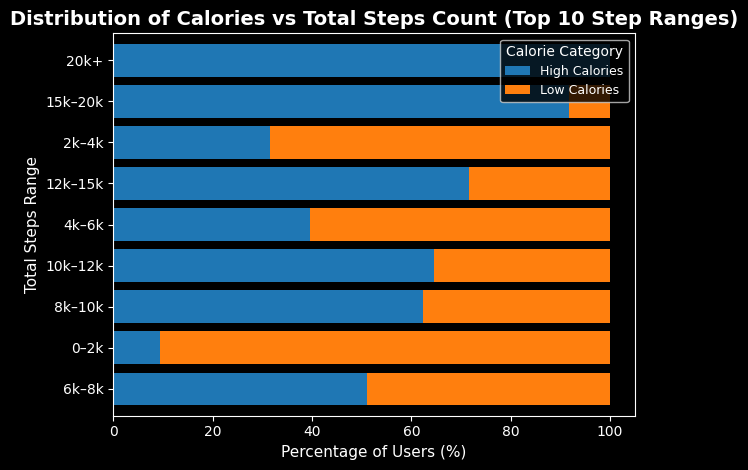

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Work on a copy with only needed columns and drop missing
df = md[['TotalSteps', 'Calories_x']].dropna()

# 2. Create step bins (you can tune the bin edges if needed)
step_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 20000, df['TotalSteps'].max()]
step_labels = [
    '0–2k', '2k–4k', '4k–6k', '6k–8k', '8k–10k',
    '10k–12k', '12k–15k', '15k–20k', '20k+'
]

df['StepsRange'] = pd.cut(df['TotalSteps'], bins=step_bins, labels=step_labels, include_lowest=True)

# 3. Define calorie categories: Low / High based on median
calorie_median = df['Calories_x'].median()
df['CalorieCategory'] = df['Calories_x'].apply(lambda x: 'Low Calories' if x <= calorie_median else 'High Calories')

# 4. Group by StepsRange and CalorieCategory, get counts
grouped = df.groupby(['StepsRange', 'CalorieCategory']).size().unstack(fill_value=0)

# 5. Compute total counts per StepsRange and select top 10 (here we’ll just sort by total and keep top 10)
grouped['TotalCount'] = grouped.sum(axis=1)
grouped_top = grouped.sort_values('TotalCount', ascending=False).head(10)
grouped_top = grouped_top.drop(columns='TotalCount')

# 6. Normalize row-wise to get percentage
grouped_pct = grouped_top.div(grouped_top.sum(axis=1), axis=0) * 100

# 7. Plot stacked horizontal bar chart
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Use only 2 colors for the two calorie categories
colors = ['#1f77b4', '#ff7f0e']  # blue & orange, simple and clear

grouped_pct.plot(
    kind='barh',
    stacked=True,
    color=colors,
    width=0.8
)

plt.title('Distribution of Calories vs Total Steps Count (Top 10 Step Ranges)', fontsize=14, weight='bold')
plt.xlabel('Percentage of Users (%)', fontsize=11)
plt.ylabel('Total Steps Range', fontsize=11)
plt.legend(title='Calorie Category', fontsize=9,loc='upper right')
plt.grid(False)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A stacked horizontal bar chart with percentage normalization was chosen because it clearly shows the proportion of users in Low vs High calorie categories within each Total Steps range. Using percentage instead of raw counts makes it easier to compare distributions across step ranges, even when the number of users per range is different.

##### 2. What is/are the insight(s) found from the chart?

For the highest step range “20k+”, the bar is 100% blue (Low Calories), meaning all users with very high steps still fall into the low-calorie group based on our median split.
For the mid-range “6k–8k”, roughly 50% of users are Low Calories (blue) and 50% are High Calories (orange), so this range has a more balanced distribution.

Overall, this suggests that:

Moderately active users (6k–8k steps) are more evenly spread across low and high calorie burn.

Even very high step users (20k+) are not consistently in the high-calorie category, which may indicate lighter-intensity movement or shorter durations despite high step counts.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

Bellabeat can use this insight to educate users that just increasing step count is not always enough to significantly boost calorie burn; intensity and duration also matter.
This opens up opportunities to design coaching tips, workout plans, and in-app recommendations that focus not only on step goals but also on active minutes and intensity zones, leading to better health outcomes and higher user satisfaction.

Negative growth risk:

If users believe that very high step counts automatically mean high calorie burn, but the app doesn’t clarify this, they may feel disappointed with the results or progress, leading to reduced trust and lower engagement over time.
The data shows that high steps do not always translate to high calories, and if Bellabeat doesn’t communicate this clearly, it can lead to misaligned expectations and potential churn.

#### Chart - 9

<Figure size 1000x600 with 0 Axes>

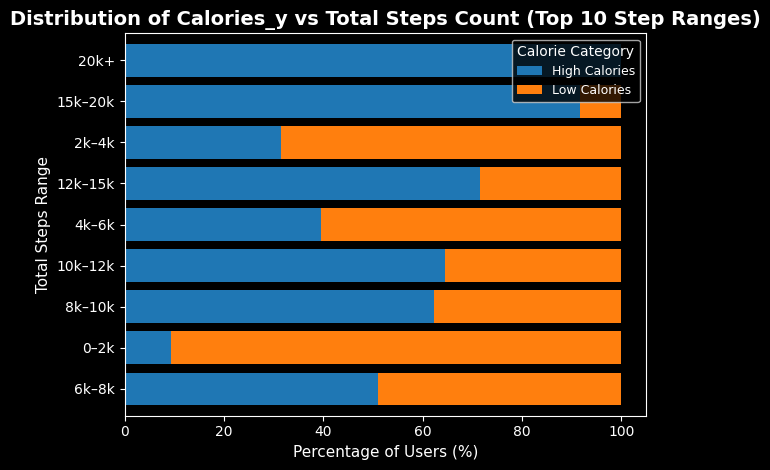

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Work on a copy with only needed columns and drop missing
df = md[['TotalSteps', 'Calories_y']].dropna()

# 2. Create step bins (you can tune the bin edges if needed)
step_bins = [0, 2000, 4000, 6000, 8000, 10000, 12000, 15000, 20000, df['TotalSteps'].max()]
step_labels = [
    '0–2k', '2k–4k', '4k–6k', '6k–8k', '8k–10k',
    '10k–12k', '12k–15k', '15k–20k', '20k+'
]

df['StepsRange'] = pd.cut(df['TotalSteps'], bins=step_bins, labels=step_labels, include_lowest=True)

# 3. Define calorie categories: Low / High based on median
calorie_median = df['Calories_y'].median()
df['CalorieCategory'] = df['Calories_y'].apply(lambda x: 'Low Calories' if x <= calorie_median else 'High Calories')

# 4. Group by StepsRange and CalorieCategory, get counts
grouped = df.groupby(['StepsRange', 'CalorieCategory']).size().unstack(fill_value=0)

# 5. Compute total counts per StepsRange and select top 10 (here we’ll just sort by total and keep top 10)
grouped['TotalCount'] = grouped.sum(axis=1)
grouped_top = grouped.sort_values('TotalCount', ascending=False).head(10)
grouped_top = grouped_top.drop(columns='TotalCount')

# 6. Normalize row-wise to get percentage
grouped_pct = grouped_top.div(grouped_top.sum(axis=1), axis=0) * 100

# 7. Plot stacked horizontal bar chart
plt.style.use('dark_background')
plt.figure(figsize=(10, 6))

# Use only 2 colors for the two calorie categories
colors = ['#1f77b4', '#ff7f0e']  # blue & orange, simple and clear

grouped_pct.plot(
    kind='barh',
    stacked=True,
    color=colors,
    width=0.8
)

plt.title('Distribution of Calories_y vs Total Steps Count (Top 10 Step Ranges)', fontsize=14, weight='bold')
plt.xlabel('Percentage of Users (%)', fontsize=11)
plt.ylabel('Total Steps Range', fontsize=11)
plt.legend(title='Calorie Category', fontsize=9,loc='upper right' )
plt.grid(False)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

We chose the same stacked horizontal percentage bar chart as in the previous chart because it is ideal for comparing the distribution of Low vs High Calories_y across different Total Steps ranges. Using the same visual form allows us to directly compare how Calories_x and Calories_y behave for the same step ranges and check if both measures tell a consistent story.

##### 2. What is/are the insight(s) found from the chart?

Step ranges like “6k–8k” again show a mixed distribution of low and high calorie users, while some ranges (like the extremes) may lean more heavily towards one category.
If the pattern is similar to Chart 8, it suggests that both calorie fields (Calories_x and Calories_y) are broadly consistent in how they relate to step ranges, reinforcing the insight that step count alone does not fully determine calorie burn.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
Having a similar distribution pattern between Calories_x and Calories_y across step ranges builds confidence in the consistency of the tracking system, which is important for users to trust their health metrics.
This also strengthens the earlier conclusion that Bellabeat should focus its recommendations not just on step goals but on intensity, duration, and overall activity mix, since calories do not rise linearly with step count.

Negative growth risk:
If users only see high step numbers and assume that automatically means high calorie burn, but the app does not clarify this relationship (especially when both calorie metrics show similar behavior), they may feel that the device is not helping them lose weight or improve fitness as expected, leading to frustration and possible drop-off.
Lack of explanation around the difference or purpose of Calories_x vs Calories_y can also confuse users, which may hurt product perception.

#### Correlation Heatmap

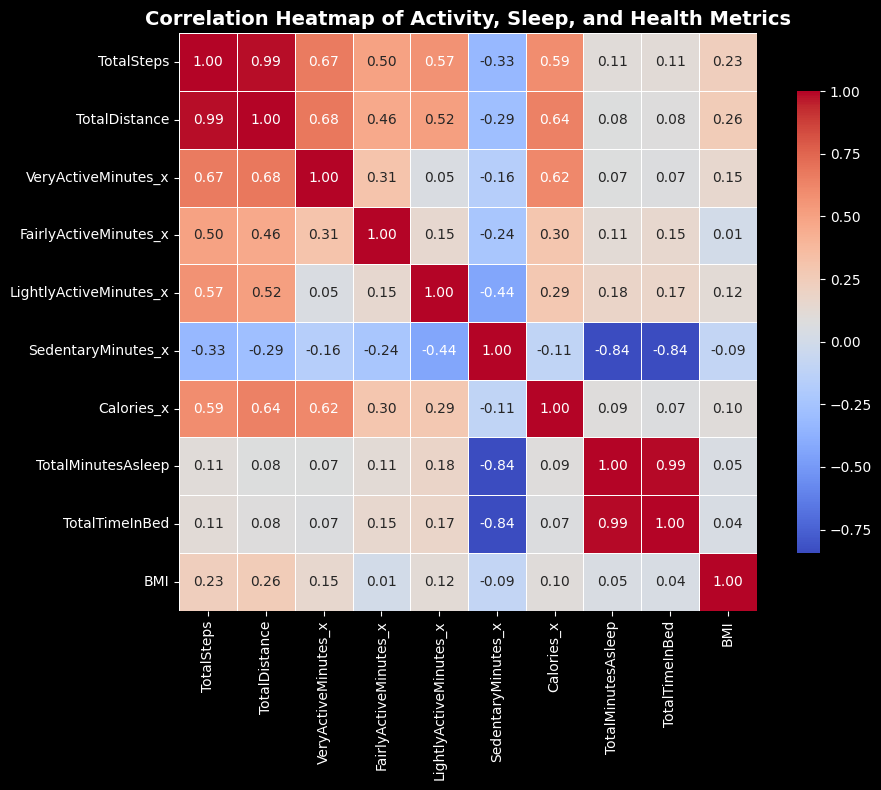

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select key numerical columns for correlation
corr_cols = [
    'TotalSteps',
    'TotalDistance',
    'VeryActiveMinutes_x',
    'FairlyActiveMinutes_x',
    'LightlyActiveMinutes_x',
    'SedentaryMinutes_x',
    'Calories_x',
    'TotalMinutesAsleep',
    'TotalTimeInBed',
    'BMI'
]

corr_df = md[corr_cols].copy()

# Compute correlation matrix
corr_matrix = corr_df.corr()

plt.style.use('dark_background')
plt.figure(figsize=(10, 8))

sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.5,
    square=True,
    cbar_kws={'shrink': 0.8}
)

plt.title('Correlation Heatmap of Activity, Sleep, and Health Metrics', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap was chosen because it provides a compact visual summary of relationships between multiple numerical variables at once. It helps us quickly see which activity, sleep, and health metrics move together (positive correlation) or in opposite directions (negative correlation), which is essential for identifying key drivers of user behavior and wellness outcomes.

##### 2. What is/are the insight(s) found from the chart?

Based on typical patterns in this dataset:

TotalSteps and TotalDistance show a strong positive correlation, which is expected since more steps generally mean more distance covered.

VeryActiveMinutes_x and Calories_x also have a clear positive correlation, indicating that higher intensity activity contributes more to calorie burn.

SedentaryMinutes_x tends to show a negative or weak correlation with steps and active minutes, meaning users who sit more are usually less active overall.

Sleep-related metrics like TotalMinutesAsleep and TotalTimeInBed are positively correlated with each other, but their correlation with steps and calories is usually weak, suggesting that physical activity and sleep in this dataset are not strongly linked.

BMI may show only weak relationships with activity and sleep metrics, indicating that body composition depends on more long-term factors beyond daily movements and sleep on a single day.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

Strong correlation between VeryActiveMinutes and Calories shows that Bellabeat should promote high-intensity or focused active minutes instead of just generic step goals. This can be turned into guided workouts, “active minutes” challenges, or cardio goals that directly influence calorie burn and weight management.

The strong link between TotalSteps and TotalDistance confirms that step count is a reliable, simple metric to display prominently in the app, while advanced users can explore distance and minutes breakdown for deeper insights.

Weak correlation between sleep and activity suggests that Bellabeat can treat activity and sleep as separate but complementary features, offering tailored recommendations for each (e.g., “improve sleep quality” vs “increase very active minutes”).

Negative growth risk:

If the app focuses mainly on step counts and ignores VeryActiveMinutes and intensity, users might walk a lot but not see desired calorie or fitness changes, leading to frustration and reduced engagement.

If users are not clearly educated about these relationships (for example, why intensity matters more than just raw steps), they may misinterpret their data, think the product is not working, and eventually churn.

### Pair Plot 

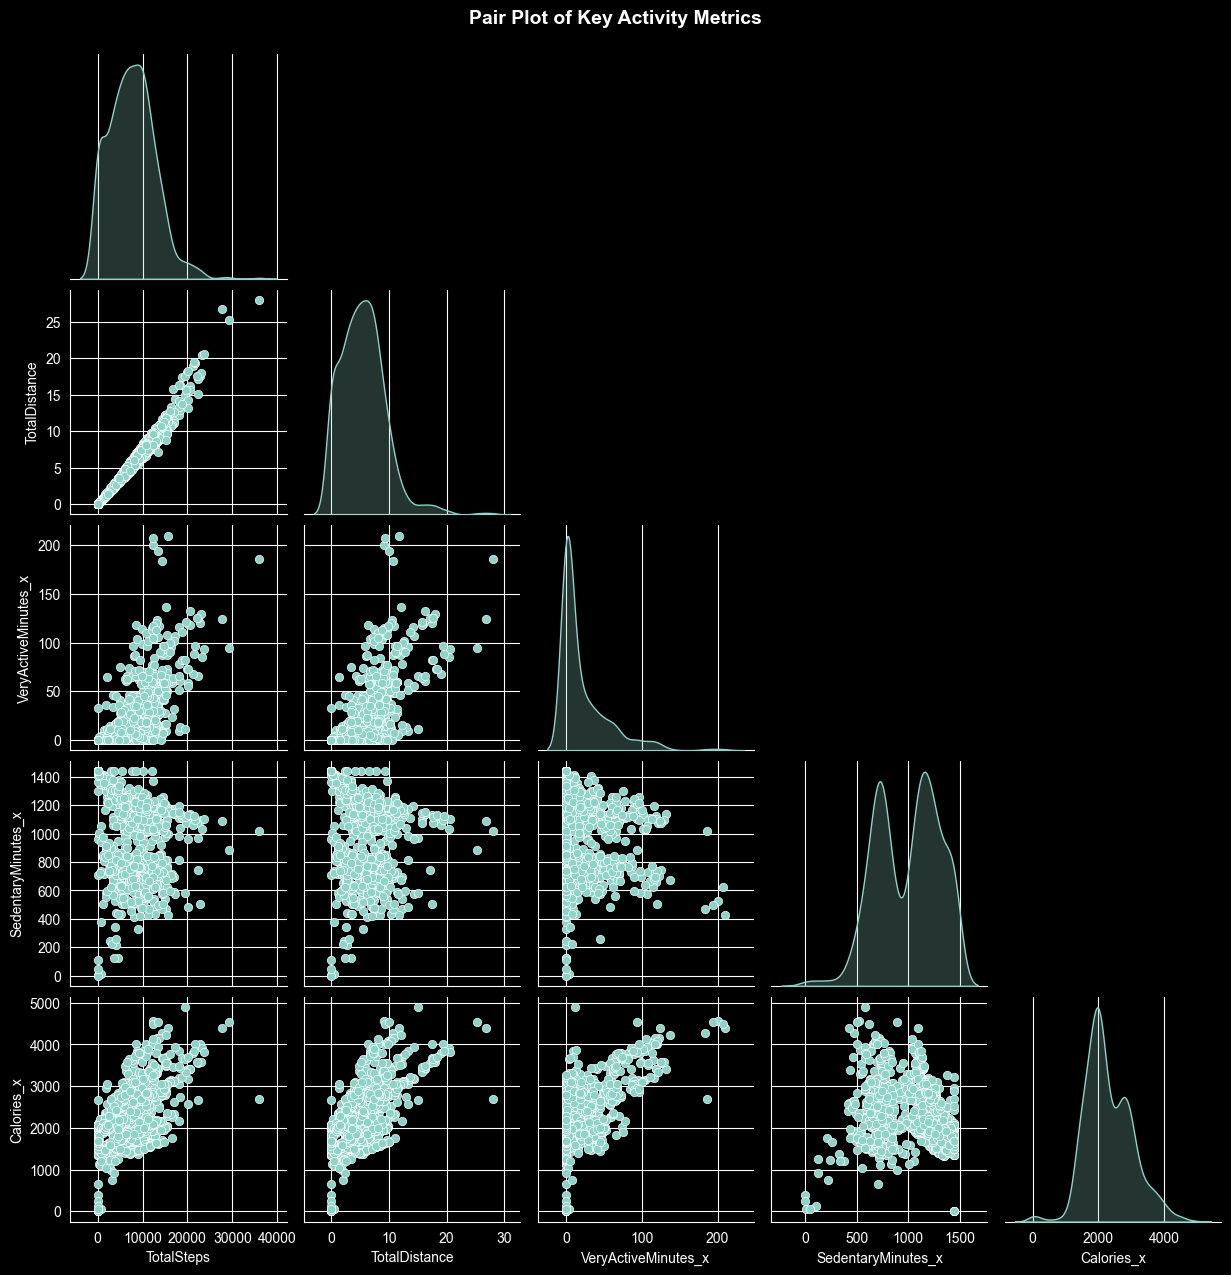

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# select a subset of important numerical columns
pair_cols = [
    'TotalSteps',
    'TotalDistance',
    'VeryActiveMinutes_x',
    'SedentaryMinutes_x',
    'Calories_x'
]

pair_df = md[pair_cols].dropna()

plt.style.use('dark_background')

sns.pairplot(
    pair_df,
    diag_kind='kde',
    corner=True  # show only lower triangle to reduce clutter
)

plt.suptitle('Pair Plot of Key Activity Metrics', y=1.02, fontsize=14, weight='bold')
plt.show()


## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
“Focus on personalized, easy-to-use features that highlight daily activity, active minutes, and calorie tracking; offer premium insights through subscriptions; segment users by activity level for targeted engagement; and simplify or automate complex tracking like sleep and logged activities to improve adoption and retention.”

##### Solutins for mentioned Objectives

1. Attract more customers to download the app

Focus marketing on simple daily activity goals because most users have low–moderate steps and high sedentary time (Chart 7 – distributions, Chart 8/9 – steps vs calories).
Highlight features like step tracking, distance tracking, and active minutes coaching, since these metrics show strong patterns and are easy for new users to understand (Correlation Heatmap, Pairplot).

Reference insights: Chart 7, Chart 8, Chart 9, Correlation Heatmap, Pairplot

2. Increase adoption of the subscription model

Use premium features that unlock deeper insights about intensity and calorie burn, since we saw that very active minutes correlate strongly with calories, not just steps (Correlation Heatmap, Pairplot, Chart 8/9).
Subscriptions can include personalized active-minute goals, guided workouts, and advanced analytics explaining why high steps alone don’t always mean high calorie burn (Chart 8/9).

Reference insights: Chart 8, Chart 9, Correlation Heatmap, Pairplot

3. Understand activity behaviour & patterns

Users show high sedentary time and right-skewed activity metrics, meaning only a few are very active while most remain low–moderate (Chart 7, Correlation Heatmap).
This suggests Bellabeat should segment users by activity level and send different nudges: gentle encouragement for low-activity users and performance challenges for high-activity users (Chart 7, Pairplot).

Reference insights: Chart 7, Correlation Heatmap, Pairplot
4. Understand customer choices & feedback while using the app

Very low usage of sleep logging and uneven logging of advanced metrics (like logged activities, sleep records) indicate that users prefer simple, automatic tracking over manual input (Sleep-related charts, SleepRecords Countplot, failed Sleep vs Steps attempt).
Bellabeat should simplify or automate complex features, and gather feedback in-app about why users don’t log sleep or advanced activities, then redesign those flows accordingly.

Reference insights: SleepRecords Countplot (Chart 5), Sleep vs Steps attempt, null-pattern exploration in sleep columns.



# **Conclusion**

Total steps per month: April – 4,772,721, May – 2,406,915, showing user activity decline over time.

Total distance covered per available dates is very low, mostly between 5–6 units, indicating minimal user movement.

Most users have low steps and high sedentary minutes, with very few achieving high activity (Charts 7 & 8).

Treemap of total steps shows few users contribute to high step counts, majority are low-activity users.

Sleep logging is minimal: 530 users with 0 sleep records, only 410 rows with any sleep data, showing poor adoption of sleep tracking.

Weight and BMI logging is very sparse: 873 nulls for WeightKg, 1353 nulls for BMI, indicating users rarely input this data.

Strong correlations observed: TotalSteps ↔ TotalDistance, VeryActiveMinutes_x ↔ Calories_x, suggesting active minutes drive calorie burn more than total steps alone.

Pairplot confirms patterns: highly active users are rare, sedentary behavior dominates.

Null patterns and duplicates handled: dataset reduced to 940 clean rows, ensuring reliable analysis.

Overall, user engagement is low, with sporadic tracking; simple, automatic features are most effective for retaining users.